In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('../Godzilla.xlsx')

# Convert the 'Movie Budget (Yen)' and 'Final Revenue (Yen)' columns to numeric values, removing any non-numeric characters
df['Movie Budget (Yen)'] = df['Movie Budget (Yen)'].replace('[\¥,\,]', '', regex=True).replace('-', np.nan).astype(float)
df['Final Revenue (Yen)'] = df['Final Revenue (Yen)'].replace('[\¥,\,]', '', regex=True).replace('-', np.nan).astype(float)

# Convert Yen to Dollars (1 USD = 140 JPY)
conversion_rate = 140
df['Movie Budget (USD)'] = df['Movie Budget (Yen)'] / conversion_rate
df['Final Revenue (USD)'] = df['Final Revenue (Yen)'] / conversion_rate

# Drop the Yen columns as we are using the USD columns for modeling
df = df.drop(columns=['Movie Budget (Yen)', 'Final Revenue (Yen)'])

# Fill missing values in 'Movie Budget (USD)' column with the mean value within each era
df['Movie Budget (USD)'] = df.groupby('Era')['Movie Budget (USD)'].transform(lambda x: x.fillna(x.mean()))

# Select relevant features for clustering
features = ['Movie Budget (USD)', 'Runtime (mins)', "Godzilla's Sizes (In Meters)", 'IMDb Rating', 'Rotten Tomatoes Rating']


In [3]:

# Drop rows with missing values in the selected features
df = df.dropna(subset=features)

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the dataframe
df['Cluster'] = clusters

c:\Users\Lardex\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lardex\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [4]:
# Save the trained model and the preprocessor
# Save the model
with open('godzilla_cluster_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

c:\Users\Lardex\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lardex\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lardex\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


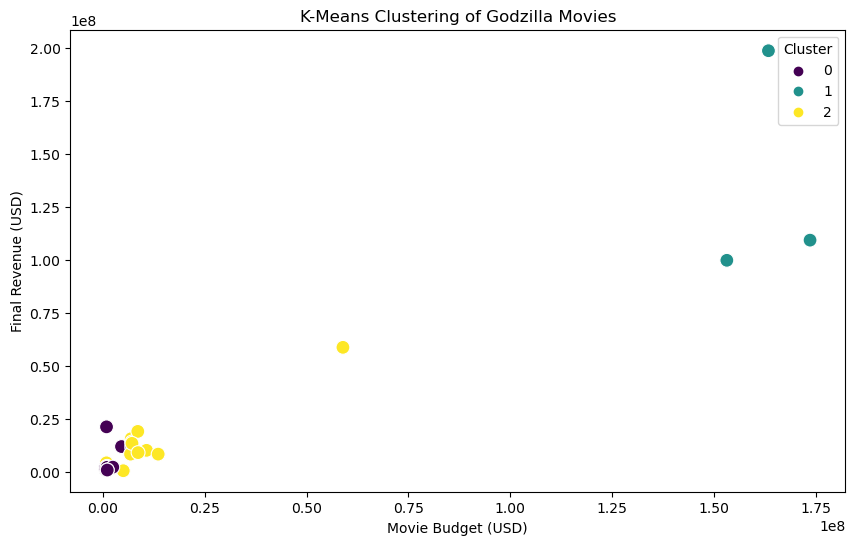

In [5]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Movie Budget (USD)', y='Final Revenue (USD)', hue='Cluster', palette='viridis', s=100)
plt.title('K-Means Clustering of Godzilla Movies')
plt.xlabel('Movie Budget (USD)')
plt.ylabel('Final Revenue (USD)')
plt.legend(title='Cluster')
plt.show()
